# 1. Impoting libraries and loading image files directory

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# skimage apis for image manipulations
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv
from skimage.transform import resize, rescale
from skimage.transform import rotate
from skimage import exposure
from skimage.filters import sobel_h, sobel_v
from skimage.filters import prewitt_h, prewitt_v

# image similarity and classification
from keras.datasets import fashion_mnist
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

# import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

from tqdm import tqdm
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/vyronas-database/Vyronasdbmin.tar.gz
/kaggle/input/vyronas-database/Vyronasdbmin/building54_right_day.jpg
/kaggle/input/vyronas-database/Vyronasdbmin/building45_zoom_cloud.jpg
/kaggle/input/vyronas-database/Vyronasdbmin/building22_left_day.jpg
/kaggle/input/vyronas-database/Vyronasdbmin/building32_low_noon.jpg
/kaggle/input/vyronas-database/Vyronasdbmin/building31_right_day.jpg
/kaggle/input/vyronas-database/Vyronasdbmin/building01_low_day.jpg
/kaggle/input/vyronas-database/Vyronasdbmin/building29_front_noon.jpg
/kaggle/input/vyronas-database/Vyronasdbmin/building45_left_day.jpg
/kaggle/input/vyronas-database/Vyronasdbmin/building37_zoom_day.jpg
/kaggle/input/vyronas-database/Vyronasdbmin/building57_left_day.jpg
/kaggle/input/vyronas-database/Vyronasdbmin/building18_zoom_noon.jpg
/kaggle/input/vyronas-database/Vyronasdbmin/building09_low_day.jpg
/kaggle/input/vyronas-database/Vyronasdbmin/building10_left_noon.jpg
/kaggle/input/vyronas-database/Vyronasdbmin/building12_fron

In [2]:
image_path_directory = '../input/vyronas-database/Vyronasdbmin/'

In [3]:
def getImagePaths(path):
    image_names = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            fullpath = os.path.join(dirname, filename)
            image_names.append(fullpath)
    return image_names

In [4]:
image_path = getImagePaths(image_path_directory)
len(image_path)

900

# 2. Read the image and print the shape of the image

Shape of image is:  (640, 480, 3)
[[[ 98 119 138]
  [ 99 120 139]
  [ 99 120 139]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 98 119 138]
  [ 99 120 139]
  [ 99 120 139]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 99 120 139]
  [ 99 120 139]
  [ 99 120 139]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 28  32  43]
  [ 28  30  42]
  [ 26  29  38]
  ...
  [ 55  61  59]
  [ 56  62  62]
  [ 61  67  67]]

 [[ 28  28  36]
  [ 27  28  33]
  [ 25  26  31]
  ...
  [ 55  59  60]
  [ 57  61  64]
  [ 61  65  68]]

 [[ 26  27  31]
  [ 25  26  30]
  [ 23  24  28]
  ...
  [ 55  59  62]
  [ 59  63  66]
  [ 62  66  69]]]


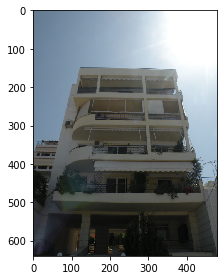

In [5]:
# read the image using skimage.imread and plot using imshow function
building_img = imread("/kaggle/input/vyronas-database/Vyronasdbmin/building44_front_day.jpg",
                      as_gray=False)
print("Shape of image is: ", building_img.shape)
print(building_img)
imshow(building_img)

In [6]:
type(building_img)

numpy.ndarray

# 3. Image reader function 

In [7]:
# define function to print images to gray and color format
def image_reader(image_path):
    image_building = imread(image_path, as_gray=False)
    image_building1 = imread(image_path, as_gray=True)
    color_shape = image_building.shape
    gray_shape = image_building1.shape
    print("Color image shape: ", color_shape)
    print("Gray image shape: ", gray_shape)
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    imshow(image_building)
    plt.title("Color image")
    plt.subplot(1,2,2)
    imshow(image_building1)
    plt.title("Gray image")
    plt.show()

Color image shape:  (640, 480, 3)
Gray image shape:  (640, 480)


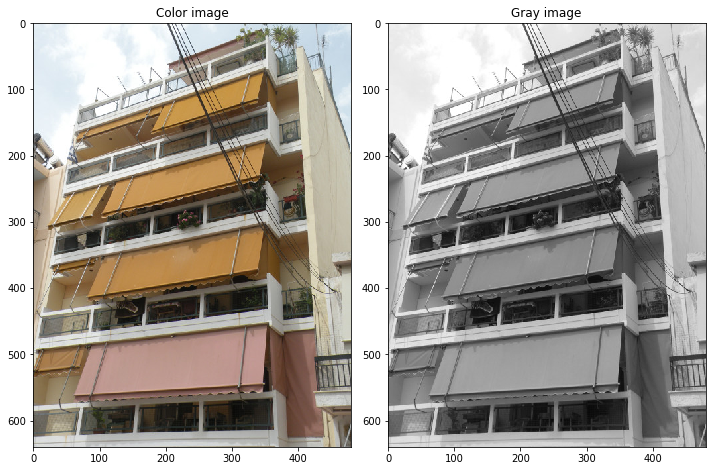

In [8]:
image_reader('/kaggle/input/vyronas-database/Vyronasdbmin/building57_right_cloud.jpg')

# 4. Convert colored image to grayscale and HSV format

Text(0.5, 1.0, 'HSV format')

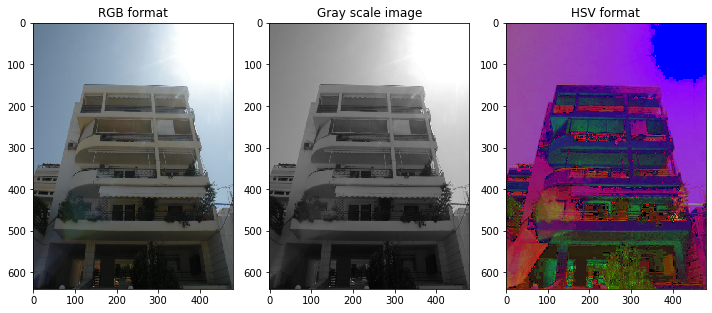

In [9]:
# convert images to grayscale and hsv format
build_gray = rgb2gray(building_img)
build_hsv = rgb2hsv(building_img)
plt.figure(figsize=(10,8))
plt.subplot(1,3,1)
imshow(building_img)
plt.title("RGB format")
plt.subplot(1,3,2)
imshow(build_gray)
plt.title("Gray scale image")
plt.subplot(1,3,3)
imshow(build_hsv)
plt.title("HSV format")

# 5. Image resizing 

Shape of the resized image:  (400, 400, 3)


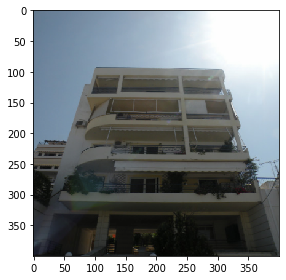

In [10]:
# resizing image using skimage.resize
build_resize = resize(building_img, (400,400))
print("Shape of the resized image: ", build_resize.shape)
imshow(build_resize)

# 6. Image rescaling

Shape of rescaled image:  (384, 240, 1)


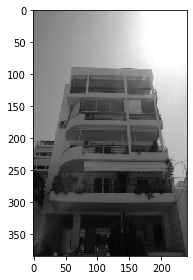

In [11]:
# rescaling image sing rescale function of skimage.rescale
build_rescale = rescale(building_img, scale=(0.6,0.5,1/3))
print("Shape of rescaled image: ", build_rescale.shape)
imshow(build_rescale)

# 7. Image rotation

Rotate image shape same as original:  (640, 480, 3)


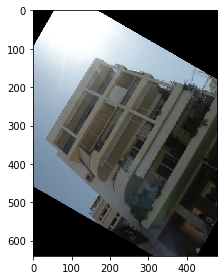

In [12]:
# rotate the image using rotate method of skimage
rotate_img = rotate(building_img, angle=60)
print("Rotate image shape same as original: ", rotate_img.shape)
imshow(rotate_img)

# 8. Image flipping

Text(0.5, 1.0, 'Up to down flip ')

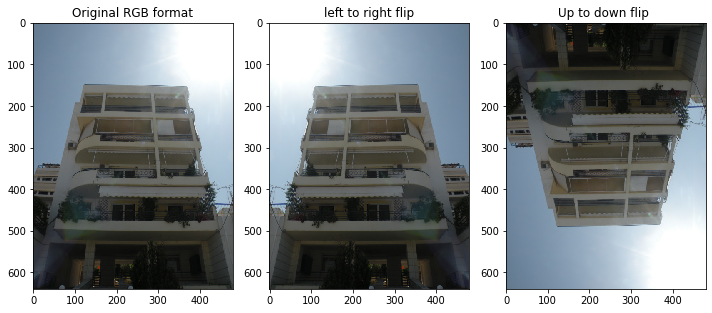

In [13]:
# flip the images left to right and up to down using numpy's fliplr and flipud
build_lr = np.fliplr(building_img)
build_ud = np.flipud(building_img)
plt.figure(figsize=(10,8))
plt.subplot(1,3,1)
imshow(building_img)
plt.title("Original RGB format")
plt.subplot(1,3,2)
imshow(build_lr)
plt.title("left to right flip")
plt.subplot(1,3,3)
imshow(build_ud)
plt.title("Up to down flip ")

# 9. Brightness adjustment of images

Text(0.5, 1.0, 'bright img with gamma=0.20')

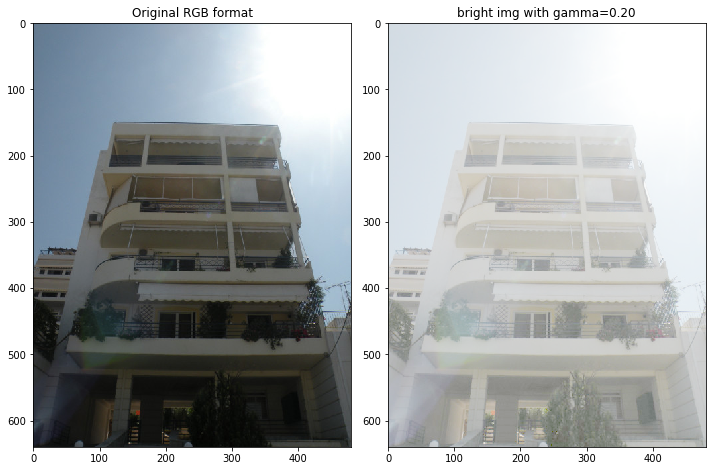

In [14]:
# adjusting brightness of the images
bright = exposure.adjust_gamma(building_img, gamma=0.20, gain=1)
dark = exposure.adjust_gamma(building_img, gamma=3, gain=1)
darkest = exposure.adjust_gamma(building_img, gamma=8, gain=1)

# plot the images
plt.figure(1, figsize=(10,8))
plt.subplot(121)
imshow(building_img)
plt.title("Original RGB format")
plt.subplot(122)
imshow(bright)
plt.title("bright img with gamma=0.20")

Text(0.5, 1.0, 'darkest img with gamma=8')

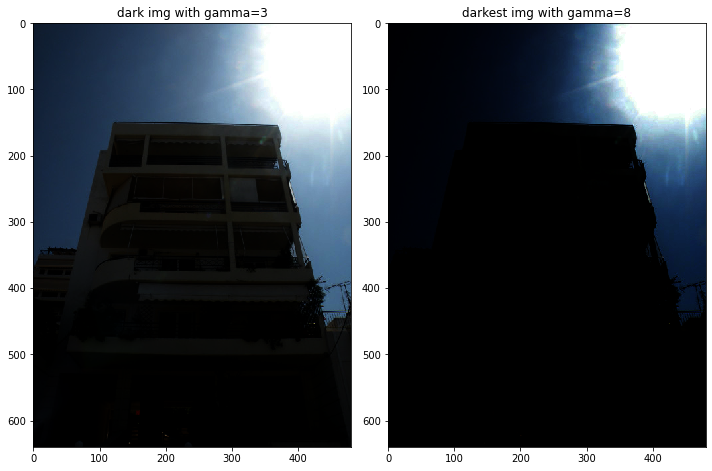

In [15]:
plt.figure(1, figsize=(10,8))
plt.subplot(121)
imshow(dark)
plt.title("dark img with gamma=3")
plt.subplot(122)
imshow(darkest)
plt.title("darkest img with gamma=8")

# 10. Cropping an images

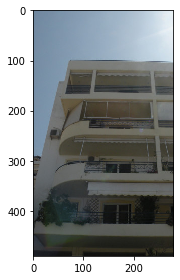

In [16]:
# cropping images 
cropped_image1 = building_img[50: (building_img.shape[0]-100), 50: (building_img.shape[1]-150)]
imshow(cropped_image1)

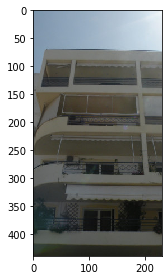

In [17]:
cropped_image2 = building_img[80: (building_img.shape[0]-120), 100: (building_img.shape[1]-150)]
imshow(cropped_image2)

# 11. Edge extraction using skimage's soble and prewitt filters

Text(0.5, 1.0, 'Vertical edge')

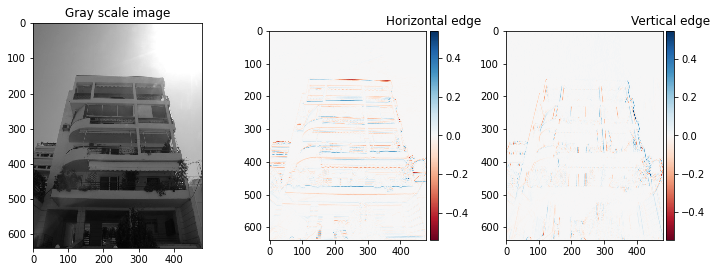

In [18]:
# Edge extraction using sobel filter
build_sobelh = sobel_h(build_gray)
build_sobelv = sobel_v(build_gray)

plt.figure(1, figsize=(10,8))
plt.subplot(131)
imshow(build_gray)
plt.title("Gray scale image")
plt.subplot(132)
imshow(build_sobelh)
plt.title("Horizontal edge")
plt.subplot(133)
imshow(build_sobelv)
plt.title("Vertical edge")

Text(0.5, 1.0, 'Vertical edge')

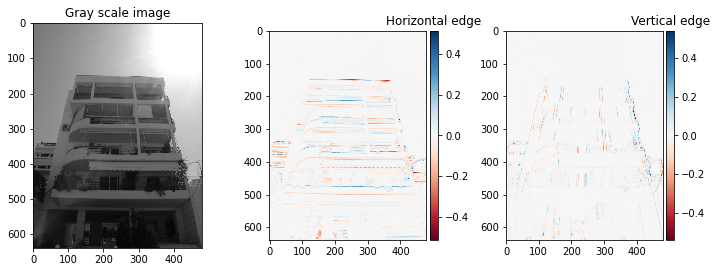

In [19]:
# edge extraction using prewitt filter
build_prewitth = prewitt_h(build_gray)
build_prewittv = prewitt_v(build_gray)

plt.figure(1, figsize=(10,8))
plt.subplot(131)
imshow(build_gray)
plt.title("Gray scale image")
plt.subplot(132)
imshow(build_prewitth)
plt.title("Horizontal edge")
plt.subplot(133)
imshow(build_prewittv)
plt.title("Vertical edge")

# 12. Image similarity techniques

In [20]:
(X_trg, y_trg), (X_tst, y_tst) = fashion_mnist.load_data()

print("Shape of the training dataset:", X_trg.shape)
print("Shape of the testing dataset:", X_tst.shape)
print("-------------------------------------------------")
print("Shape of the training target variable:", y_trg.shape)
print("Shape of the testing target variable:", y_tst.shape)
print("-------------------------------------------------")
# reshaping images to one-dimentional data
X_test = np.reshape(X_tst, (10000,784))
print("Shape of reshaped images: ", X_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
Shape of the training dataset: (60000, 28, 28)
Shape of the testing dataset: (10000, 28, 28)
-------------------------------------------------
Shape of the training target variable: (60000,)
Shape of the testing target variable: (10000,)
-------------------------------------------------
Shape of reshaped images:  (10000, 784)


## 1. Cosine similarity

In [21]:
cos_similarity = cosine_similarity(X_test)
print("Shape of cosine similarity matrix is: ", cos_similarity.shape)
print("Details of cos_similarity:", cos_similarity)

Shape of cosine similarity matrix is:  (10000, 10000)
Details of cos_similarity: [[1.         0.53737176 0.29959086 ... 0.41691091 0.29104272 0.75233371]
 [0.53737176 1.         0.57679881 ... 0.51693626 0.5259895  0.60401192]
 [0.29959086 0.57679881 1.         ... 0.5212979  0.77687777 0.38123159]
 ...
 [0.41691091 0.51693626 0.5212979  ... 1.         0.46994367 0.38640914]
 [0.29104272 0.5259895  0.77687777 ... 0.46994367 1.         0.3511436 ]
 [0.75233371 0.60401192 0.38123159 ... 0.38640914 0.3511436  1.        ]]


In [22]:
# convert to pandas dataframe
cos_sim_df = pd.DataFrame(cos_similarity)
cos_sim_df.shape

(10000, 10000)

In [23]:
# find out the info of the product
pro_info = cos_sim_df.iloc[245].values
print("Product info index 245 in dataset:" ,pro_info)

Product info index 245 in dataset: [0.73391198 0.72703189 0.4878277  ... 0.46116883 0.46004688 0.76807936]


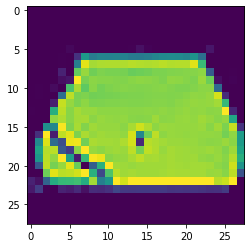

In [24]:
# show the image of index 245
plt.imshow(X_tst[245])

In [25]:
# finding similarity top 10 similar images to the index 245 using argsort method of numpy
index_images = np.argsort(-pro_info)[0:10]
print("index of similar images: ", index_images)

index of similar images:  [ 245 8361 3602 9229 9404 7240 1103 3213 8143 6497]


Text(0.5, 0.98, 'Similar images to the index 245')

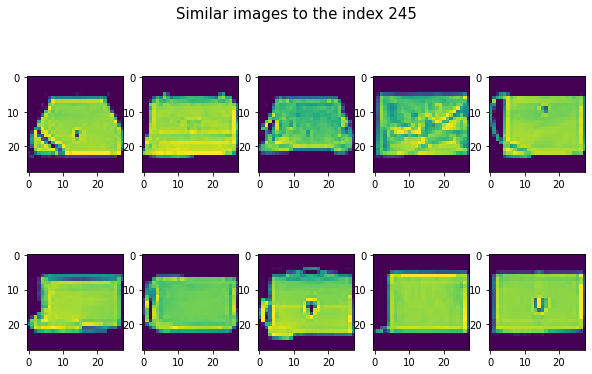

In [26]:
# print the similar image
fig, axs = plt.subplots(2,5, figsize=(10,6))
for idx, i in enumerate(index_images):
    axs[idx//5, idx%5].imshow(X_tst[i])
    
plt.suptitle("Similar images to the index 245", fontsize=15)

## 2. Euclidean distance

In [27]:
# using euclidean distance
euclid_sim  = euclidean_distances(X_test)
print("Shape of the matrix: ", euclid_sim.shape)
print("Euclid_sim similarity index: ", euclid_sim)

Shape of the matrix:  (10000, 10000)
Euclid_sim similarity index:  [[   0.         4052.72673641 3458.6190886  ... 2588.43968444
  3054.00180092 1495.7466363 ]
 [4052.72673641    0.         3962.1592598  ... 4101.74231273
  4085.4699852  4033.5728579 ]
 [3458.6190886  3962.1592598     0.         ... 2980.20469096
  2135.8874034  3139.0590947 ]
 ...
 [2588.43968444 4101.74231273 2980.20469096 ...    0.
  2753.35159397 2400.81985996]
 [3054.00180092 4085.4699852  2135.8874034  ... 2753.35159397
     0.         2701.79810497]
 [1495.7466363  4033.5728579  3139.0590947  ... 2400.81985996
  2701.79810497    0.        ]]


In [28]:
# converting them into pandas dataframe
euclid_df = pd.DataFrame(euclid_sim)
euclid_df.shape

(10000, 10000)

In [29]:
# sort the most similar images of an index 640
sim_images = euclid_df.iloc[640].sort_values(ascending=True)[:10]
sim_images

640        0.000000
412     1185.489772
746     1200.242892
7761    1207.612107
1461    1213.964579
2502    1224.024918
8971    1231.260330
448     1233.948540
2651    1240.569224
944     1242.942477
Name: 640, dtype: float64

In [30]:
# index of similar images
index_sim_images = sim_images.index
index_sim_images

Int64Index([640, 412, 746, 7761, 1461, 2502, 8971, 448, 2651, 944], dtype='int64')

Text(0.5, 0.98, 'Similar images to the index 640')

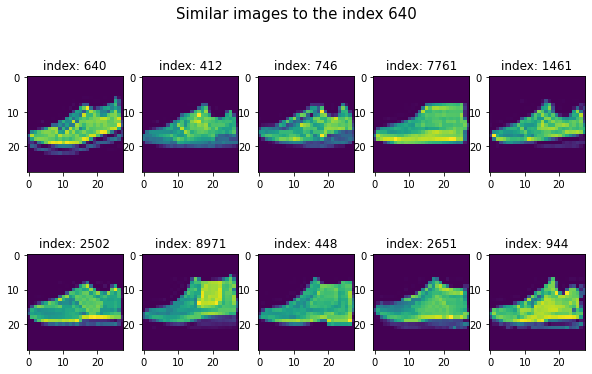

In [31]:
# print the similar image
fig, axs = plt.subplots(2,5, figsize=(10,6))
for idx, i in enumerate(index_sim_images):
    axs[idx//5, idx%5].imshow(X_tst[i])
    axs[idx//5, idx%5].set_title(f'index: {i}')
    
plt.suptitle("Similar images to the index 640", fontsize=15)

## 4. Manhattan distances

In [32]:
# using manhattan distances
manhattan = manhattan_distances(X_test)
print("Shape of distance matrix: ", manhattan.shape)
print("Manhattan distance matrixL", manhattan)

Shape of distance matrix:  (10000, 10000)
Manhattan distance matrixL [[    0. 83718. 64230. ... 43202. 55089. 22634.]
 [83718.     0. 74808. ... 82314. 79825. 84176.]
 [64230. 74808.     0. ... 47900. 27379. 57220.]
 ...
 [43202. 82314. 47900. ...     0. 43089. 41798.]
 [55089. 79825. 27379. ... 43089.     0. 48281.]
 [22634. 84176. 57220. ... 41798. 48281.     0.]]


In [33]:
# converting them into pandas dataframe
manhattan_df = pd.DataFrame(manhattan)
manhattan_df.shape

(10000, 10000)

In [34]:
# find the most similar image of index 1000
manhattan_sim_df = manhattan_df.iloc[1000].sort_values(ascending=True)[:10]
manhattan_sim_df

1000        0.0
1450    21279.0
5633    23283.0
5518    23605.0
5186    24098.0
9607    24555.0
4413    24578.0
1249    24741.0
4206    24819.0
4220    25209.0
Name: 1000, dtype: float64

In [35]:
# take the index of similar image of index 1000
mh_index = manhattan_sim_df.index
mh_index

Int64Index([1000, 1450, 5633, 5518, 5186, 9607, 4413, 1249, 4206, 4220], dtype='int64')

Text(0.5, 0.98, 'Similar images to the index 1000')

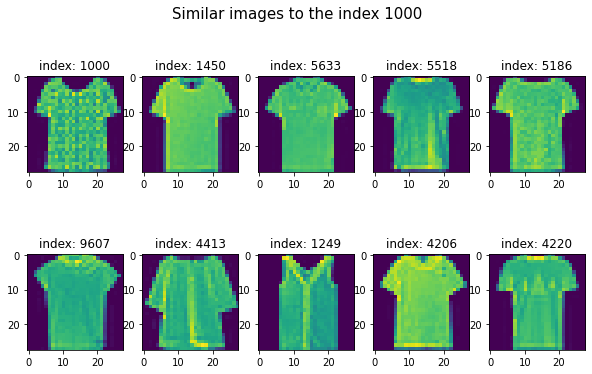

In [36]:
# print the similar image
fig, axs = plt.subplots(2,5, figsize=(10,6))
for idx, i in enumerate(mh_index):
    axs[idx//5, idx%5].imshow(X_tst[i])
    axs[idx//5, idx%5].set_title(f'index: {i}')
    
plt.suptitle("Similar images to the index 1000", fontsize=15)

# 13. Grouping similar images

In [37]:
# reshaping the 28*28 image dataset for clustering and training
X_train = np.reshape(X_trg, (60000, 784))
y_train = np.reshape(y_trg, (60000))

In [38]:
# applying KMeans algorithm
clusters = KMeans(n_clusters=10, random_state=42)
y_clusters = clusters.fit_predict(X_train)
print("clusters are:\n", y_clusters)
print("The centers are:\n", clusters.cluster_centers_)

clusters are:
 [0 5 6 ... 5 6 6]
The centers are:
 [[-1.19262239e-17  1.47304988e-02  1.47304988e-02 ...  1.16046200e+01
   5.18747908e+00  3.72614664e-01]
 [ 8.23993651e-18 -1.02348685e-16  9.22872889e-16 ... -9.54791801e-14
   2.23154828e-14  2.19269047e-15]
 [ 5.20074891e-04  5.51279384e-03  3.25566882e-02 ...  6.25587685e+00
   8.97233202e-01  5.83524027e-02]
 ...
 [-8.89045781e-18  1.69491525e-03  2.37288136e-02 ...  6.75000000e-01
   4.94915254e-01  9.70338983e-02]
 [ 4.02468473e-04  8.18352562e-03  5.66138986e-02 ...  2.50590287e+00
   5.38771130e-01  5.55406493e-02]
 [-1.00830802e-17  2.49609984e-02  8.15132605e-02 ...  8.80850234e+00
   3.64547582e+00  4.89079563e-01]]


In [39]:
# creating original class and clustering prediction
clusters_df = pd.DataFrame({"Original":y_train, "Predicted":y_clusters}, columns=['Original','Predicted'])
clusters_df.head(10)

,Original,Predicted
0,9,0
1,0,5
2,0,6
3,3,8
4,0,4
5,2,2
6,7,1
7,2,2
8,5,6
9,5,6


In [40]:
# create original VS predicted classes dataframe using kmeans clustering 
orig_cls = clusters_df['Original'].value_counts().reset_index()
pred_cls = clusters_df['Predicted'].value_counts().reset_index()
merged_df = pd.merge(orig_cls, pred_cls, how='left', on='index')
merged_df.rename(columns = {'index':"Classes"}, inplace=True)
final_df =merged_df.sort_values(by='Classes', ascending=True)
final_df

,Classes,Original,Predicted
1,0,6000,2986
6,1,6000,6535
3,2,6000,9614
2,3,6000,4257
8,4,6000,9085
5,5,6000,7386
7,6,6000,7759
4,7,6000,2360
9,8,6000,7454
0,9,6000,2564


# 14. Supervised image classification of MNIST dataset using sklearn

In [41]:
# test data 
X_test = np.reshape(X_tst, (10000,784))
y_test = np.reshape(y_tst, (10000))

In [42]:
%%time
# let's build classificaiton model to classfiy MNIST images
models = {"NB": GaussianNB(),
          "DT": DecisionTreeClassifier(),
          "RF": RandomForestClassifier(),
          "BC": BaggingClassifier()
         }

# fit the model to the data
for idx, val in tqdm(models.items()):
    model = val.fit(X_train,y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    con_matrix = confusion_matrix(y_test, preds)
    print(f"Accuracy of model {idx}: \n", acc)
    print("----------------------------------")
    print(f"Confusion matrix of {idx}: \n", con_matrix)

 25%|██▌       | 1/4 [00:01<00:03,  1.11s/it]

Accuracy of model NB: 
 0.5856
----------------------------------
Confusion matrix of NB: 
 [[586  64  29 162 110   0  20   0  29   0]
 [  1 939  14  36   7   0   1   0   2   0]
 [  7  14 324  65 545   0  23   0  22   0]
 [  9 387   6 545  43   0   4   0   6   0]
 [  0  34  44 131 779   0   4   0   8   0]
 [  0   0   1   1   0 278   3 660   5  52]
 [117  34 112 200 435   0  40   0  62   0]
 [  0   0   0   0   0   3   0 988   0   9]
 [  0   2  19  85 149   3  27   4 710   1]
 [  0   0   1   1   0  16   3 304   8 667]]


 50%|█████     | 2/4 [00:45<00:53, 26.81s/it]

Accuracy of model DT: 
 0.7903
----------------------------------
Confusion matrix of DT: 
 [[735   2  31  37  11   0 173   1   9   1]
 [  6 953   4  22   7   0   5   0   2   1]
 [ 21   1 660  19 148   0 134   0  16   1]
 [ 47  29  19 778  65   0  48   0  14   0]
 [ 12   3 182  47 637   0 112   0   7   0]
 [  0   2   0   2   0 885   0  59  22  30]
 [146   7 136  43  97   3 545   1  18   4]
 [  0   0   0   0   0  44   0 885   6  65]
 [  8   2  14   8  11   9  23   6 914   5]
 [  0   0   0   0   0  20   1  64   4 911]]


 75%|███████▌  | 3/4 [02:16<00:55, 55.93s/it]

Accuracy of model RF: 
 0.8755
----------------------------------
Confusion matrix of RF: 
 [[858   1  14  28   4   1  84   0  10   0]
 [  3 962   2  21   2   0   8   0   2   0]
 [ 10   0 808  11 112   0  57   0   2   0]
 [ 21   2  10 902  30   0  33   0   2   0]
 [  1   1  97  38 811   0  48   0   4   0]
 [  0   0   0   1   0 955   0  31   1  12]
 [150   1 125  27  95   0 587   0  15   0]
 [  0   0   0   0   0  10   0 951   0  39]
 [  1   2   4   2   5   2   7   5 972   0]
 [  0   0   0   0   0   6   1  42   2 949]]


100%|██████████| 4/4 [07:05<00:00, 106.31s/it]

Accuracy of model BC: 
 0.8562
----------------------------------
Confusion matrix of BC: 
 [[843   2  18  30   5   3  87   0  12   0]
 [  1 964   3  19   1   0  12   0   0   0]
 [ 20   0 776  11 117   0  69   0   7   0]
 [ 33   6  20 864  41   2  30   0   4   0]
 [  4   2 128  36 767   0  62   0   1   0]
 [  0   0   0   1   0 957   0  26   3  13]
 [153   2 123  30 104   1 573   0  14   0]
 [  0   0   0   0   0  29   0 943   4  24]
 [  1   3   8   2   6   6  20   3 950   1]
 [  0   0   0   0   0  12   2  56   5 925]]
CPU times: user 7min 4s, sys: 1.1 s, total: 7min 5s
Wall time: 7min 5s


### Random forest model is the top performer for image clssification of MNIST dataset with accuracy of 87.7% while naive nayes model gives lowest accuracy